In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)


2.8.2
2.8.0


# Zad
Porównaj wyniki działań różnych optymalizacji


In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.5410 - accuracy: 0.7468 - val_loss: 0.4515 - val_accuracy: 0.7554
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3679 - accuracy: 0.8252 - val_loss: 0.3437 - val_accuracy: 0.8364
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3391 - accuracy: 0.8407 - val_loss: 0.3397 - val_accuracy: 0.8436
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8424 - val_loss: 0.3335 - val_accuracy: 0.8433
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3300 - accuracy: 0.8458 - val_loss: 0.3296 - val_accuracy: 0.8450
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3282 - accuracy: 0.8452 - val_loss: 0.3287 - val_accuracy: 0.8464
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3270 - accuracy: 0.8474 - val_loss: 0.3308 - val_accuracy: 0.8465

In [8]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

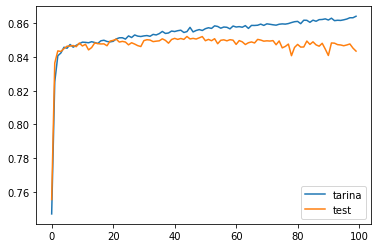

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

# Zad

Użyjmy LearningRateScheduler

In [10]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer="SGD", metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_lr_1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.5631 - accuracy: 0.7511 - val_loss: 0.5548 - val_accuracy: 0.7543 - lr: 0.0100
Epoch 2/100
943/943 [=======

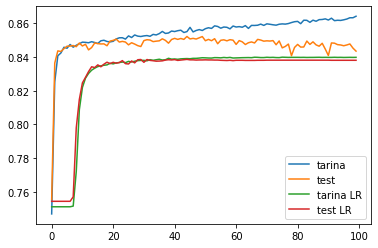

In [11]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")

plt.plot(history_lr_1.history['accuracy'], label = "tarina LR")
plt.plot(history_lr_1.history['val_accuracy'], label = "test LR")
plt.legend()
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

# Adam

In [12]:
history_adam = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


943/943 [==============================] - 3s 3ms/step - loss: 0.3830 - accuracy: 0.8195 - val_loss: 0.3435 - val_accuracy: 0.8418
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3370 - accuracy: 0.8439 - val_loss: 0.3324 - val_accuracy: 0.8469
Epoch 3/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3296 - accuracy: 0.8470 - val_loss: 0.3301 - val_accuracy: 0.8477
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3257 - accuracy: 0.8478 - val_loss: 0.3261 - val_accuracy: 0.8481
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3236 - accuracy: 0.8490 - val_loss: 0.3280 - val_accuracy: 0.8484
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3227 - accuracy: 0.8493 - val_loss: 0.3266 - val_accuracy: 0.8485
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3213 - accuracy: 0.8492 - val_loss: 0.3243 - val_accuracy: 0.8491
Epoch 8/100

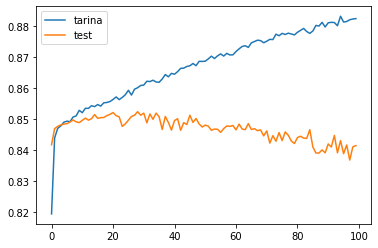

In [13]:
import matplotlib.pyplot as pl
plt.plot(history_adam.history['accuracy'], label = "tarina")
plt.plot(history_adam.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

In [14]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_adam_lr_1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_adam_lr_1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


943/943 [==============================] - 3s 3ms/step - loss: 0.3563 - accuracy: 0.8370 - val_loss: 0.3312 - val_accuracy: 0.8474 - lr: 0.0100
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3242 - accuracy: 0.8485 - val_loss: 0.3272 - val_accuracy: 0.8474 - lr: 0.0100
Epoch 3/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3180 - accuracy: 0.8515 - val_loss: 0.3290 - val_accuracy: 0.8426 - lr: 0.0100
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3119 - accuracy: 0.8536 - val_loss: 0.3233 - val_accuracy: 0.8495 - lr: 0.0100
Epoch 5/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3095 - accuracy: 0.8555 - val_loss: 0.3218 - val_accuracy: 0.8499 - lr: 0.0100
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3064 - accuracy: 0.8578 - val_loss: 0.3221 - val_accuracy: 0.8497 - lr: 0.0100
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0

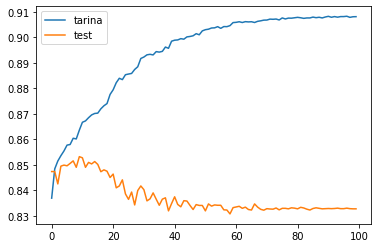

In [15]:
import matplotlib.pyplot as pl
plt.plot(history_adam_lr_1.history['accuracy'], label = "tarina")
plt.plot(history_adam_lr_1.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

In [16]:
from keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

history_adam_lr_2 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"])

lrate = LearningRateScheduler(step_decay)
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[lrate, history_adam_lr_2])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4200      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


943/943 [==============================] - 3s 3ms/step - loss: 0.3497 - accuracy: 0.8368 - val_loss: 0.3394 - val_accuracy: 0.8402 - lr: 0.0100
Epoch 2/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3271 - accuracy: 0.8477 - val_loss: 0.3256 - val_accuracy: 0.8450 - lr: 0.0100
Epoch 3/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3199 - accuracy: 0.8528 - val_loss: 0.3248 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 4/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3155 - accuracy: 0.8535 - val_loss: 0.3212 - val_accuracy: 0.8499 - lr: 0.0100
Epoch 5/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3119 - accuracy: 0.8555 - val_loss: 0.3200 - val_accuracy: 0.8505 - lr: 0.0100
Epoch 6/100
943/943 [==============================] - 2s 3ms/step - loss: 0.3069 - accuracy: 0.8559 - val_loss: 0.3234 - val_accuracy: 0.8483 - lr: 0.0100
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0

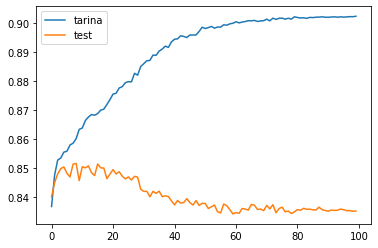

In [17]:
import matplotlib.pyplot as pl
plt.plot(history_adam_lr_2.history['accuracy'], label = "tarina")
plt.plot(history_adam_lr_2.history['val_accuracy'], label = "test")
plt.legend()
plt.show()